## Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines
sns.set_style("whitegrid")

np.random.seed(88)

In [2]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

In [3]:
light = pd.read_csv("datasets/st1/michelson_speed_of_light.csv")
light.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,5-Jun,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.1,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.5,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [4]:
speed = light["velocity of light in air (km/s)"]
speed.head()

0    299850
1    299740
2    299900
3    300070
4    299930
Name: velocity of light in air (km/s), dtype: int64

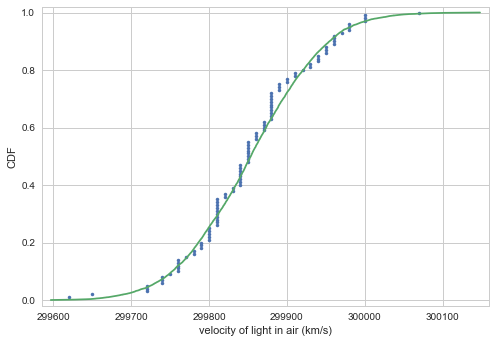

In [5]:
mean = np.mean(speed)
std = np.std(speed)

samples = np.random.normal(mean, std, size = 10000)

x, y = ecdf(speed)
x_theory, y_theory = ecdf(samples)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
_ = plt.plot(x_theory, y_theory)

_ = plt.xlabel("velocity of light in air (km/s)")
_ = plt.ylabel("CDF")

plt.margins(0.02)
plt.show()

Optimal parameters are parameter values that bring the model in closest agreement with the data.

### Linear regression by least squares

* Least squares: The process of finding the parameters for which the sum of the squares of the residuals is minimal.

In [6]:
df_all_states = pd.read_csv("datasets/st1/2008_all_states.csv")
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [7]:
total_votes = df_all_states["total_votes"]
dem_share = df_all_states["dem_share"]

In [8]:
slope, intercept = np.polyfit(total_votes, dem_share, 1)

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 3.37055368645e-05
Intercept: 40.8087905358


In [9]:
litfert = pd.read_csv("datasets/st2/female_literacy_fertility.csv")

In [10]:
litfert["illiteracy"] = 100 - litfert["female literacy"]
litfert.head()

,Country,Continent,female literacy,fertility,population,illiteracy
0,Chine,ASI,90.5,1.769,"1,324,655,000",9.5
1,Inde,ASI,50.8,2.682,"1,139,964,932",49.2
2,USA,NAM,99.0,2.077,"304,060,000",1.0
3,Indonésie,ASI,88.8,2.132,"227,345,082",11.2
4,Brésil,LAT,90.2,1.827,"191,971,506",9.8


In [11]:
illiteracy = litfert["illiteracy"]
fertility = litfert["fertility"]

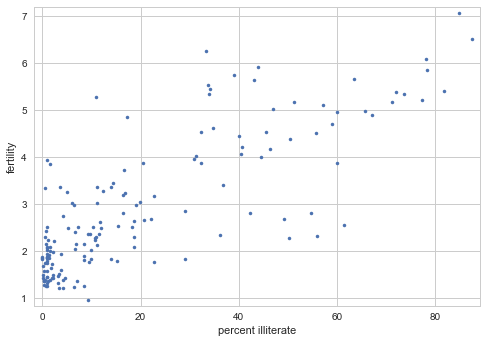

In [12]:
_ = plt.plot(illiteracy, fertility, marker = ".", linestyle = "none")
_ = plt.xlabel("percent illiterate")
_ = plt.ylabel("fertility")

plt.margins(0.02)

plt.show()

In [13]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

In [14]:
print(pearson_r(illiteracy, fertility))

0.804132402682


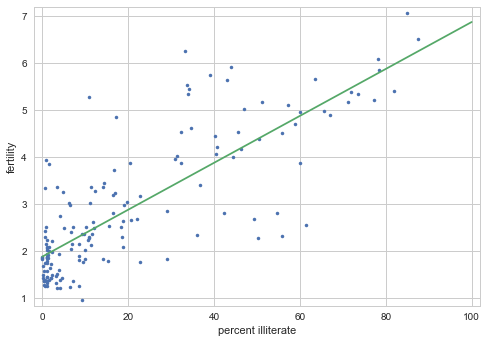

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


In [15]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

## How is it optimal?
The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares).

Plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

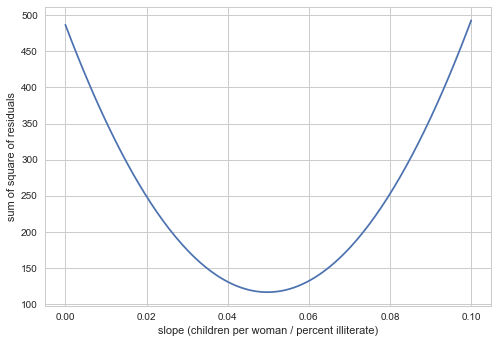

In [16]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200) # slopes

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

## Bootstrap confidence intervals

To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. In statistical inference, you want to know what would happen if you could repeat your data acquisition an infinite number of times. 

This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called bootstrapping. 

### Bootstrapping

* The use of resampled data to perform statistical inference. Sampling with replacement. 
* Each resampled array is called a bootstrampped sample. 
* A bootstrap replicate is a statistic computed from a resampled array. 

In [17]:
data = [1, 2, 3, 4, 5]
np.random.choice(data, size = 5)

array([1, 4, 2, 4, 3])

In [18]:
bs_sample = np.random.choice(speed, size = 100)

In [19]:
np.mean(bs_sample)

299844.0

In [20]:
np.median(bs_sample)

299840.0

In [21]:
np.std(bs_sample)

74.16198487095663

In [22]:
def bootstrap_replicate_1d(data, func):
    # generate bootstrap replicate of 1-dimensional data
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [23]:
bootstrap_replicate_1d(speed, np.mean)

299848.90000000002

In [24]:
bootstrap_replicate_1d(speed, np.std)

77.335308882812384

In [25]:
bootstrap_replicate_1d(speed, np.median)

299850.0

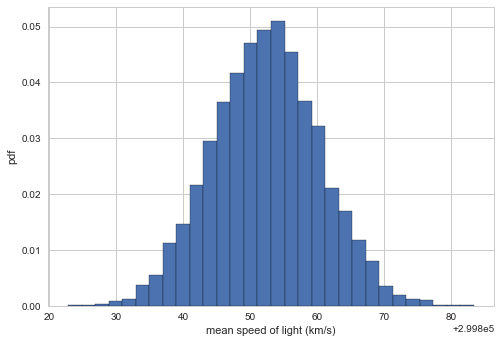

In [26]:
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(speed, np.mean)
    
_ = plt.hist(bs_replicates, bins = 30, normed = True)
_ = plt.xlabel("mean speed of light (km/s)")
_ = plt.ylabel("pdf")
plt.show()

### Confidence interval of a statistic

If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval. 

In [27]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5]) # 95% confidence interval
conf_int

array([ 299837.,  299868.])

In [28]:
def draw_bs_reps(data, func, size = 1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

Here, we'll compute the bootstrap estimate of the probability distribution function of the mean speed of light. This is a probabilistic estimate of the mean. 

SEM: 7.86145024789
Bootstrap Std: 7.79611361045


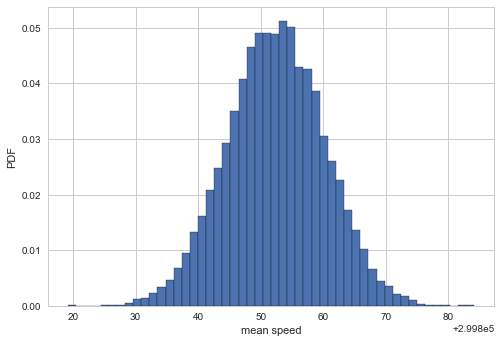

In [29]:
# take 10,000 bootstrap replicates of the mean:
bs_replicates = draw_bs_reps(speed, np.mean, size = 10000)

# compute and print SEM
# The standard deviation of this distribution, 
# called the standard error of the mean, or SEM, is given 
# by the standard deviation of the data divided by the 
# square root of the number of data points.
sem = np.std(speed) / np.sqrt(len(speed))
print("SEM:", sem)

# compute the std of the bootstrap reps
bs_std = np.std(bs_replicates)
print("Bootstrap Std:", bs_std)

_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel("mean speed")
_ = plt.ylabel("PDF")

plt.show()

Notice that the SEM that we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

#### Confidence intervals

A confidence interval gives bounds on the range of parameter values you might expect to get if we repeated our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can just take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

In [30]:
np.percentile(bs_replicates, [2.5, 97.5]) # 95% confidence interval

array([ 299837.1,  299867.5])

### Bootstrap replicates of other statistics
We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: we can always take bootstrap replicates!

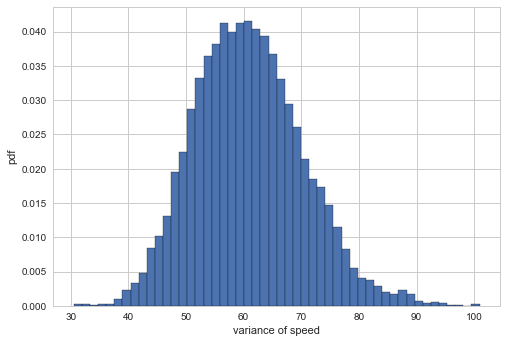

In [31]:
bs_replicates = draw_bs_reps(speed, np.var, size = 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel("variance of speed")
_ = plt.ylabel("pdf")
plt.show()

This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates.

In [32]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int)

95% confidence interval = [ 44.14405  80.9295 ]


## Nonparametric inference

* Makes no assumptions about the model or probability distribution underlying the data. 

## Pairs bootstrap for linear regression

* Resample data in pairs. 
* Compute slope and intercept from resampled data.
* Each slope and intercept is a bootstrap replicate. 
* Compute confidence intervals from percentiles of bootstrap replicates. 

Because np.random.choice() takes in a 1D array, we're going to sample the indices now. 

In [33]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [34]:
len(total_votes)

3153

In [35]:
inds = np.arange(len(total_votes))

In [36]:
bs_inds = np.random.choice(inds, len(inds))

In [37]:
bs_total_votes = total_votes[bs_inds]
bs_dem_share = dem_share[bs_inds]

In [38]:
# compute a pairs bootstrap replicate

bs_slope, bs_intercept = np.polyfit(bs_total_votes, 
                                       bs_dem_share, 1)

In [39]:
bs_slope

3.7017108640030486e-05

In [40]:
bs_intercept

40.638204257820611

In [41]:
np.polyfit(total_votes, dem_share, 1) # fit of original

array([  3.37055369e-05,   4.08087905e+01])

Pretty close

In [42]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


[ 0.04446053  0.0551738 ]


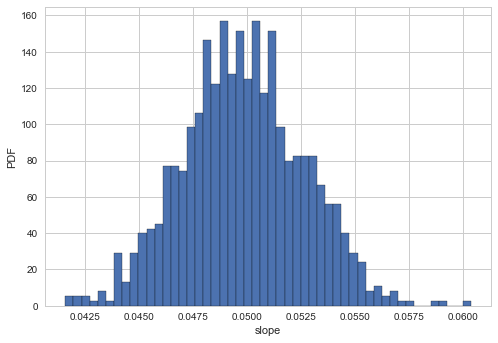

In [43]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size = 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

## Plotting bootstrap regressions
A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. 

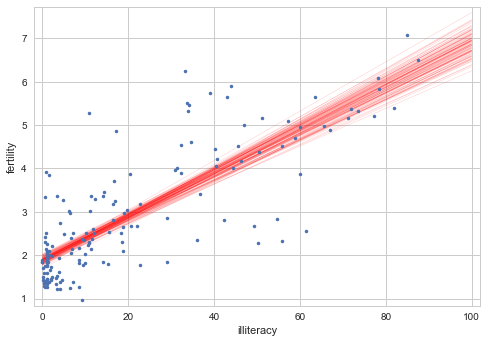

In [44]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker = ".", linestyle = "none")

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

## Hypothesis testing

Now we kow how to define and estimate parameters given a model. But the question remains: how reasonable is it to observe your data if a model is true? This question is addressed by hypothesis tests. They are the icing on the inference cake.

It is an assessment of how reasonable the observed data are assuming a hypothesis is true.

* Null hypothesis = another name for the hypothesis you are testing. 
* Permuatation = random ordering of entries in an array.


In [45]:
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [46]:
dem_share_PA = np.array(df_all_states[df_all_states["state"] == "PA"]["dem_share"])
dem_share_OH = np.array(df_all_states[df_all_states["state"] == "OH"]["dem_share"])

In [47]:
dem_share_PA

array([ 60.08,  40.64,  36.07,  41.21,  31.04,  43.78,  44.08,  46.85,
        44.71,  46.15,  63.1 ,  52.2 ,  43.18,  40.24,  39.92,  47.87,
        37.77,  40.11,  49.85,  48.61,  38.62,  54.25,  34.84,  47.75,
        43.82,  55.97,  58.23,  42.97,  42.38,  36.11,  37.53,  42.65,
        50.96,  47.43,  56.24,  45.6 ,  46.39,  35.22,  48.56,  32.97,
        57.88,  36.05,  37.72,  50.36,  32.12,  41.55,  54.66,  57.81,
        54.58,  32.88,  54.37,  40.45,  47.61,  60.49,  43.11,  27.32,
        44.03,  33.56,  37.26,  54.64,  43.12,  25.34,  49.79,  83.56,
        40.09,  60.81,  49.81])

In [48]:
dem_share_OH

array([ 56.94,  50.46,  65.99,  45.88,  42.23,  45.26,  57.01,  53.61,
        59.1 ,  61.48,  43.43,  44.69,  54.59,  48.36,  45.89,  48.62,
        43.92,  38.23,  28.79,  63.57,  38.07,  40.18,  43.05,  41.56,
        42.49,  36.06,  52.76,  46.07,  39.43,  39.26,  47.47,  27.92,
        38.01,  45.45,  29.07,  28.94,  51.28,  50.1 ,  39.84,  36.43,
        35.71,  31.47,  47.01,  40.1 ,  48.76,  31.56,  39.86,  45.31,
        35.47,  51.38,  46.33,  48.73,  41.77,  41.32,  48.46,  53.14,
        34.01,  54.74,  40.67,  38.96,  46.29,  38.25,   6.8 ,  31.75,
        46.33,  44.9 ,  33.57,  38.1 ,  39.67,  40.47,  49.44,  37.62,
        36.71,  46.73,  42.2 ,  53.16,  52.4 ,  58.36,  68.02,  38.53,
        34.58,  69.64,  60.5 ,  53.53,  36.54,  49.58,  41.97,  38.11])

In [49]:
dem_share_both = np.concatenate((dem_share_PA, dem_share_OH))

In [50]:
dem_share_both

array([ 60.08,  40.64,  36.07,  41.21,  31.04,  43.78,  44.08,  46.85,
        44.71,  46.15,  63.1 ,  52.2 ,  43.18,  40.24,  39.92,  47.87,
        37.77,  40.11,  49.85,  48.61,  38.62,  54.25,  34.84,  47.75,
        43.82,  55.97,  58.23,  42.97,  42.38,  36.11,  37.53,  42.65,
        50.96,  47.43,  56.24,  45.6 ,  46.39,  35.22,  48.56,  32.97,
        57.88,  36.05,  37.72,  50.36,  32.12,  41.55,  54.66,  57.81,
        54.58,  32.88,  54.37,  40.45,  47.61,  60.49,  43.11,  27.32,
        44.03,  33.56,  37.26,  54.64,  43.12,  25.34,  49.79,  83.56,
        40.09,  60.81,  49.81,  56.94,  50.46,  65.99,  45.88,  42.23,
        45.26,  57.01,  53.61,  59.1 ,  61.48,  43.43,  44.69,  54.59,
        48.36,  45.89,  48.62,  43.92,  38.23,  28.79,  63.57,  38.07,
        40.18,  43.05,  41.56,  42.49,  36.06,  52.76,  46.07,  39.43,
        39.26,  47.47,  27.92,  38.01,  45.45,  29.07,  28.94,  51.28,
        50.1 ,  39.84,  36.43,  35.71,  31.47,  47.01,  40.1 ,  48.76,
      

In [51]:
dem_share_perm = np.random.permutation(dem_share_both) # scramble the array
dem_share_perm

array([ 42.23,  47.87,  60.5 ,  36.11,  34.84,  44.69,  44.03,  29.07,
        45.45,  56.94,  43.18,  39.92,  61.48,  68.02,  45.6 ,  49.58,
        36.43,  43.82,  31.47,  54.74,  50.1 ,  48.76,  32.88,  44.08,
        46.15,  46.85,  40.45,  46.33,  31.04,  54.64,  39.67,  42.38,
        40.11,  49.79,  54.37,  46.33,  48.46,  41.55,  49.44,  36.05,
        42.97,  52.76,  27.92,  44.71,  38.62,  41.77,  60.08,  37.77,
        57.88,  27.32,  48.36,  53.61,  57.81,  33.57,  49.81,  35.71,
        46.73,  46.07,  83.56,  44.9 ,  39.43,  31.56,  47.75,  63.1 ,
        48.61,  45.26,  37.72,  48.62,  46.29,  42.65,  38.96,  36.54,
        39.26,  42.2 ,  47.43,  36.71,  59.1 ,  39.86,  50.46,  60.49,
        49.85,  28.94,  40.1 ,  43.43,  36.07,  39.84,  45.88,  37.53,
        37.62,  41.21,  51.38,  60.81,  40.24,  41.56,  54.25,  38.07,
        53.16,  32.97,  28.79,  52.4 ,  43.12,  38.53,  47.47,  34.58,
        65.99,  56.24,  50.36,  38.1 ,  69.64,  54.59,  36.06,  43.11,
      

In [52]:
# assign the first 67 to be PA and the rest to be OH
# these samples are called permutation samples

perm_sample_PA = dem_share_perm[:len(dem_share_PA)]
perm_sample_OH = dem_share_perm[len(dem_share_PA):]

Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions.

In [53]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

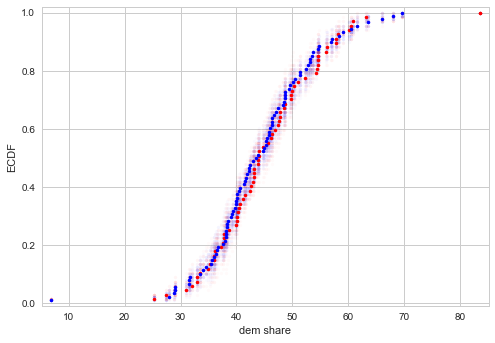

In [54]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(dem_share_PA, dem_share_OH)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2 , marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(dem_share_PA)
x_2, y_2 = ecdf(dem_share_OH)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('dem share')
_ = plt.ylabel('ECDF')
plt.show()

Notice the permutation samples ECDFs overlap and give a purple haze. The ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is commensurate with the data. 

Are OH and PA different? Hypothesis testing is an assessment of how reasonable the observed data are assuming a hypothesis is true. But what about the data do we assess and how do we quantify the assessment? The answer hinges on a test statistic. 

## Test statistic

* A single number that can be computed from observed data and from data you simulate under the null hypothesis, 
* It serves as a basis of comparison between the two. 

Question: Are the 2 states different? If they are identical, they should have the same mean vote share for Obama. So the difference in mean vote share should be zero. Therefore, we will choose the difference in mean as our test statistic. 

In [55]:
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)

1.2591858887381235

The test statistic for the permutations is 1.25% (permutation replicate). 

In [56]:
np.mean(dem_share_PA) - np.mean(dem_share_OH) # original data

1.1582360922659447

## P-value

* The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true. 

* It is NOT the probability that the null hypothesis is true. 

### Statistical significance

* Determined by the smallness of a p-value. 

### Statistical Significance != Practical Significance

In [63]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data.

In [59]:
frog = pd.read_csv("datasets/st2/frog_tongue.csv")
frog.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


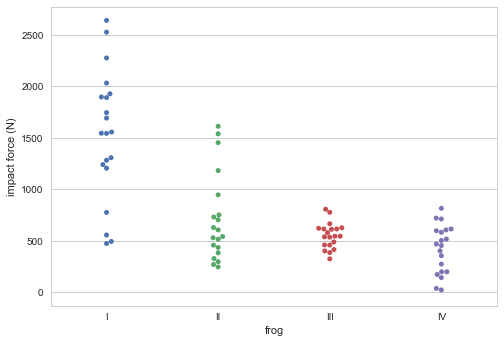

In [62]:
# Make bee swarm plot
_ = sns.swarmplot(x = "ID", y = "impact force (mN)", data = frog)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()


Eyeballing it, it does not look like they come from the same distribution. However, it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.